In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
df=pd.read_csv('application_train.csv')

In [53]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df.shape

(307511, 122)

There are 282686 loans repaid on time (TARGET=0) and 24825 loans defaulted (TARGET=1) in the dataset


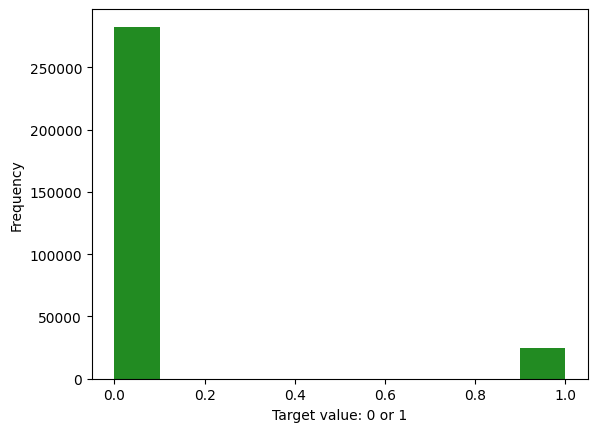

In [56]:
df['TARGET'].astype(int).plot.hist(color='forestgreen').set_xlabel('Target value: 0 or 1');

count = df['TARGET'].value_counts()
num_repaid = count[0]
num_default = count[1]

print("There are {} loans repaid on time (TARGET=0) and {} loans defaulted (TARGET=1) in the dataset".format(num_repaid, num_default))

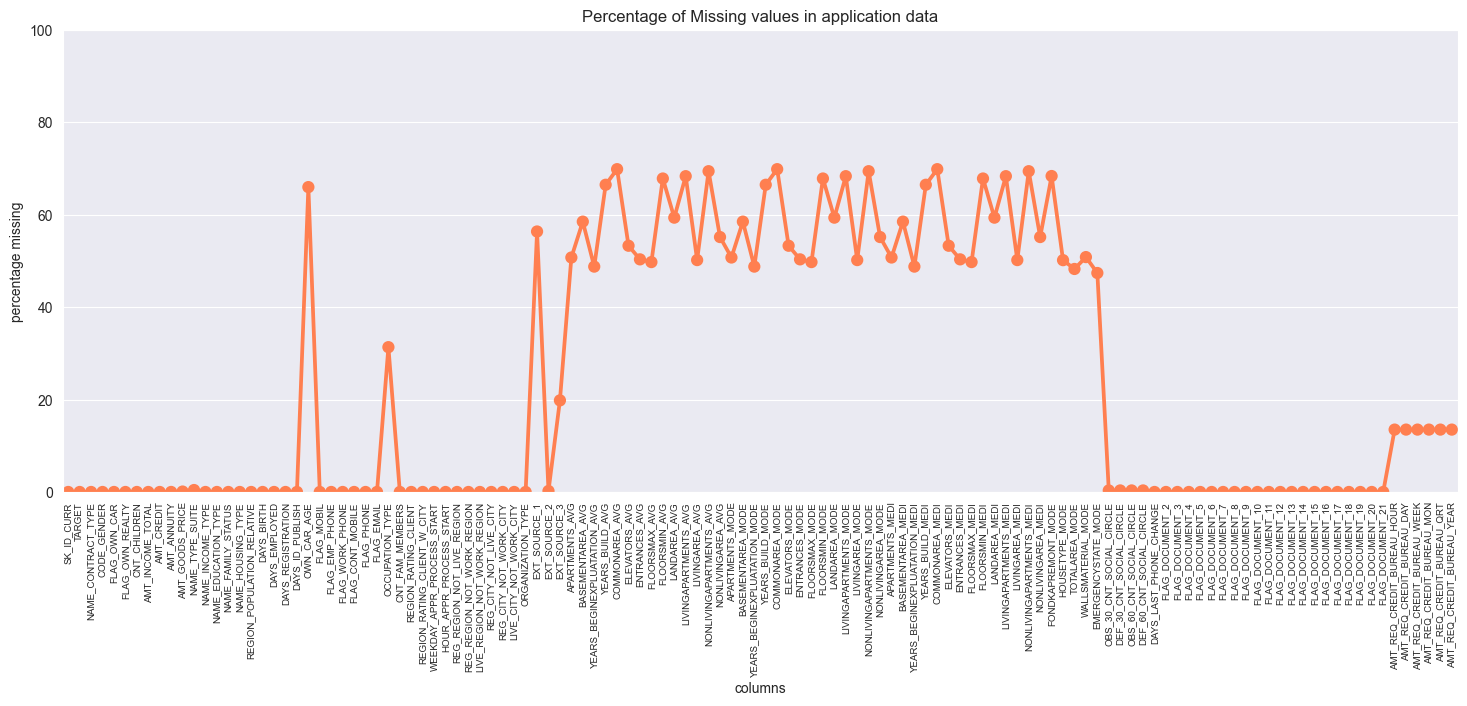

In [63]:
fig = plt.figure(figsize=(18,6))
miss_data = pd.DataFrame((df.isnull().sum()*100)/df.shape[0]).reset_index()
miss_data.columns = ["Column", "Percentage"]
miss_data["Type"] = "application data"
sns.set_style('darkgrid')
ax = sns.pointplot(x="Column", y="Percentage", data=miss_data, color='coral')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application data")
plt.ylabel("percentage missing")
plt.xlabel("columns")
plt.ylim((0,100))

plt.show()

In [64]:
def plot_bar_gen(feature, d = None, orientation_horizontal = True):
    
    if d is None:
        d = df
    else:
        d = d
    
    temp = d[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = d[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    sns.set_color_codes("colorblind")
    
    if orientation_horizontal == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        s1 = sns.barplot(y = feature, x="Number of contracts",data=df1)
        plt.subplot(122)
        s2 = sns.barplot(y = feature, x='TARGET', data=cat_perc)
        plt.xlabel('Fraction of loans defaulted', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        
    else:
        plt.figure(figsize=(10,18))
        plt.subplot(211)
        s1 = sns.barplot(x = feature, y="Number of contracts",data=df1)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        plt.subplot(212)
        s2 = sns.barplot(x = feature, y='TARGET', data=cat_perc)
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
        plt.ylabel('Fraction of loans defaulted', fontsize=12)
        plt.xlabel(feature, fontsize=12)
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.6)
    plt.show()

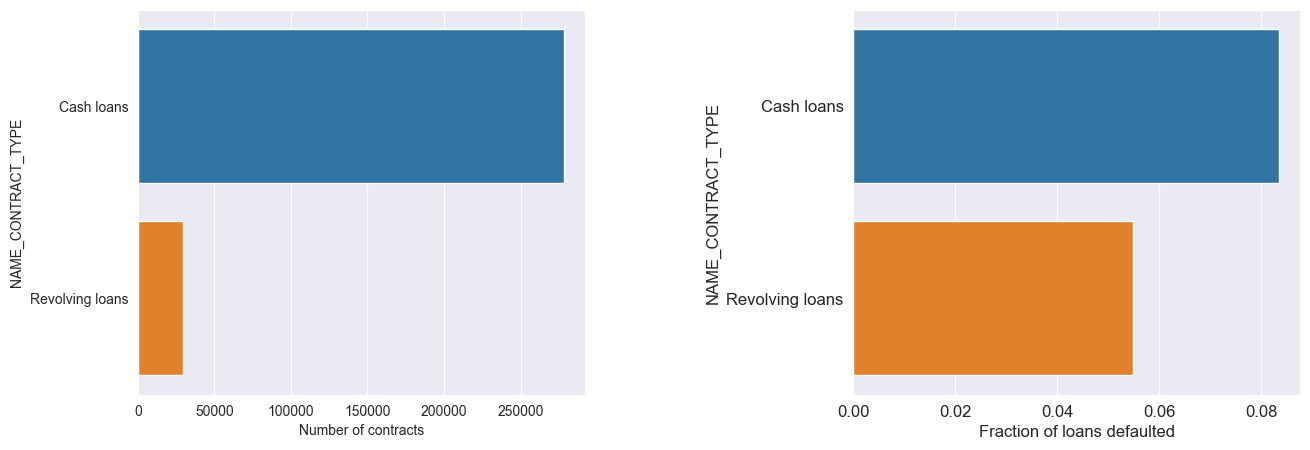

In [65]:
plot_bar_gen('NAME_CONTRACT_TYPE')

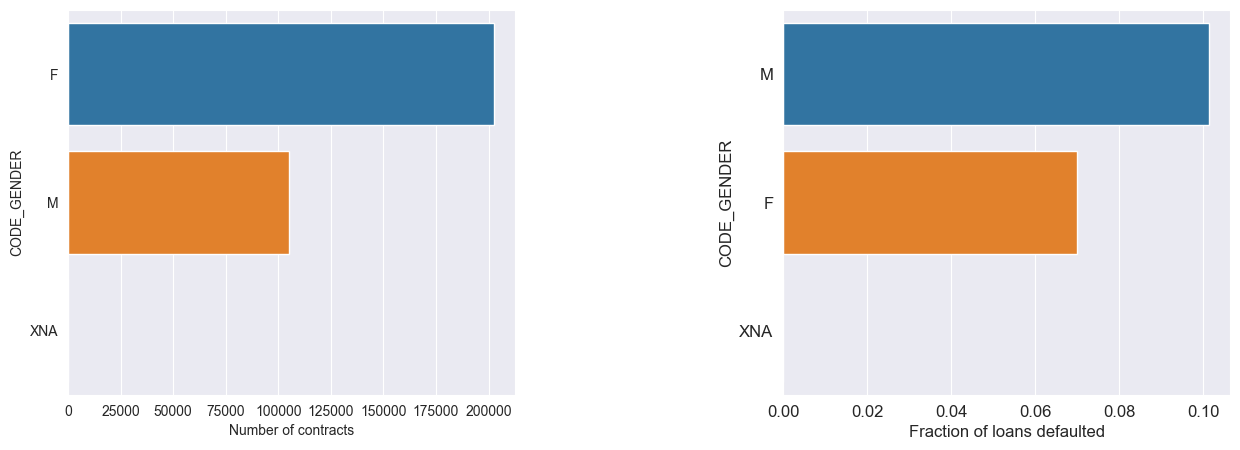

In [66]:
plot_bar_gen('CODE_GENDER')

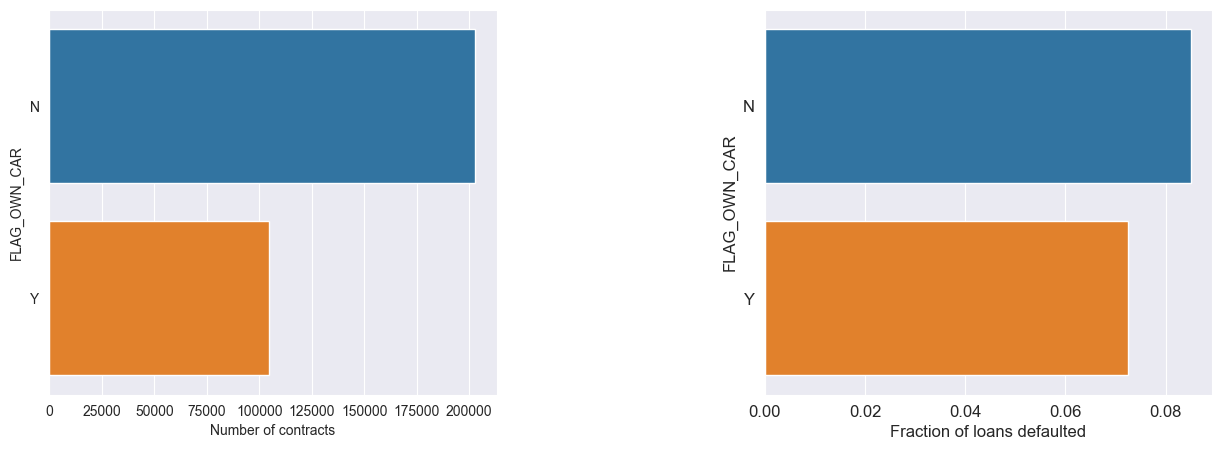

In [67]:
plot_bar_gen('FLAG_OWN_CAR')

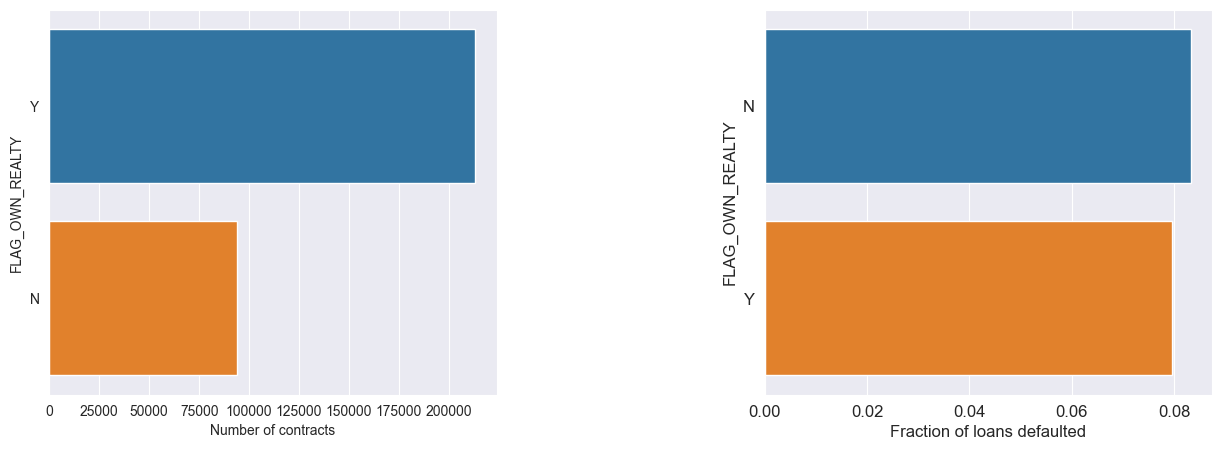

In [68]:
plot_bar_gen('FLAG_OWN_REALTY')

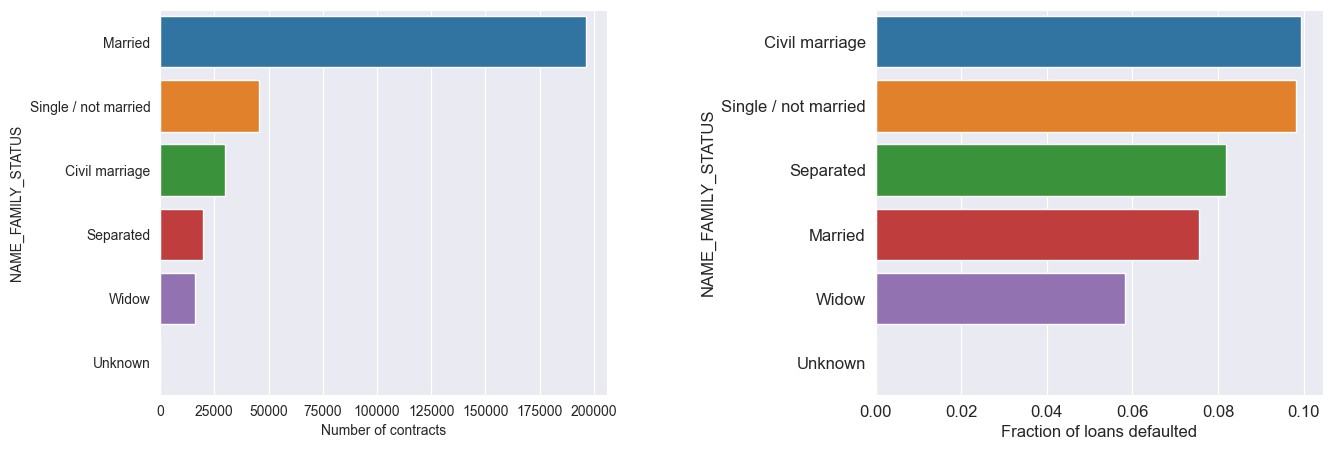

In [69]:
plot_bar_gen('NAME_FAMILY_STATUS')

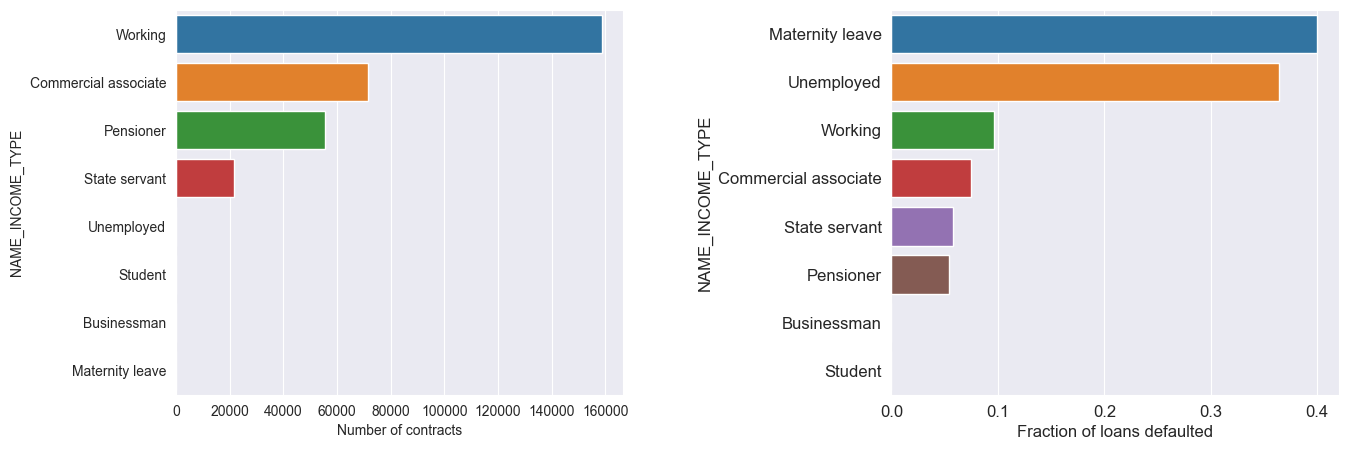

In [70]:
plot_bar_gen('NAME_INCOME_TYPE')

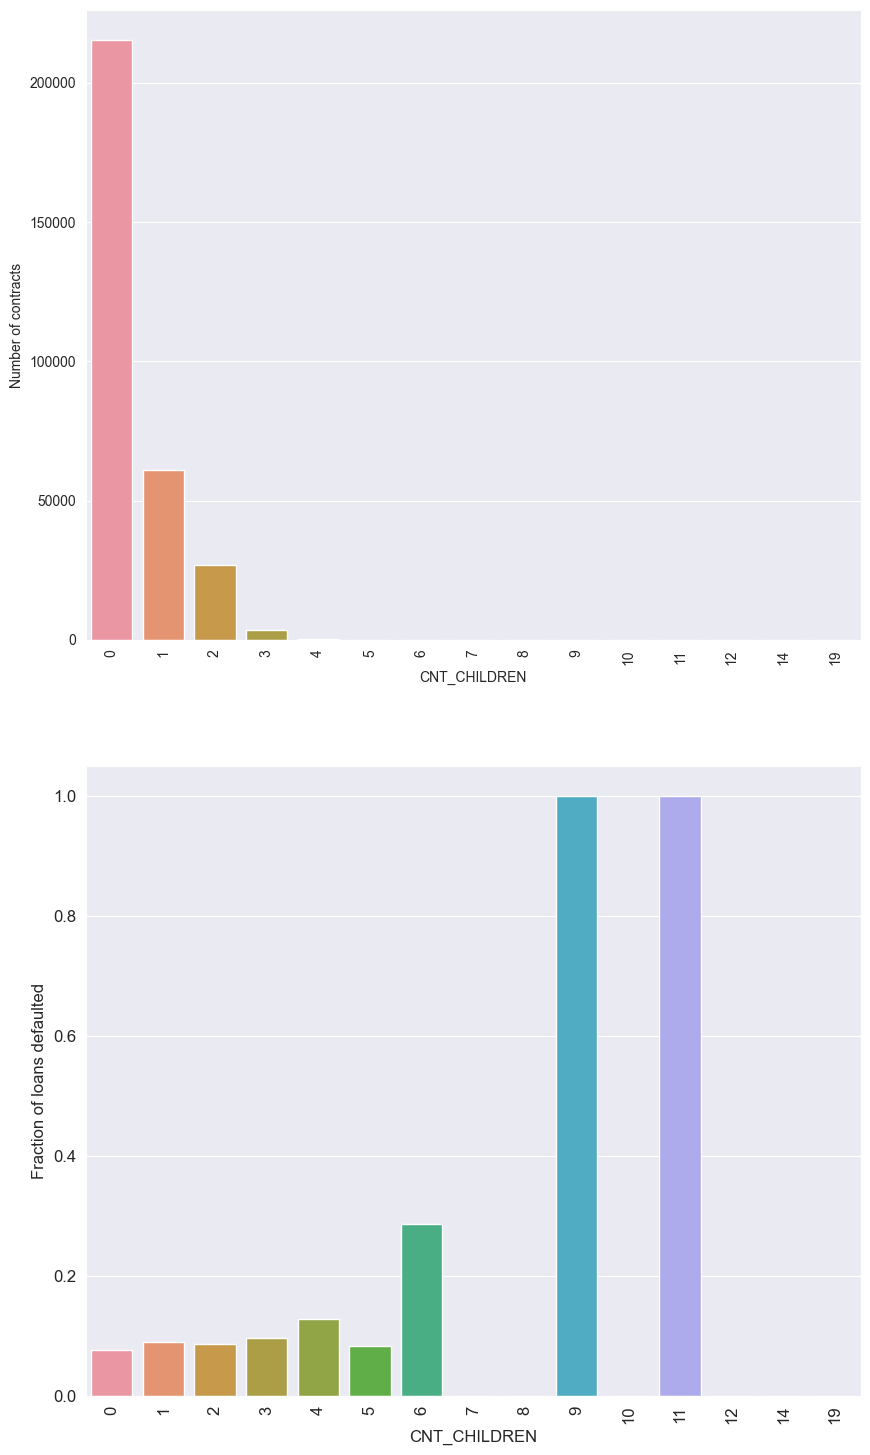

In [71]:
plot_bar_gen('CNT_CHILDREN',None,False)

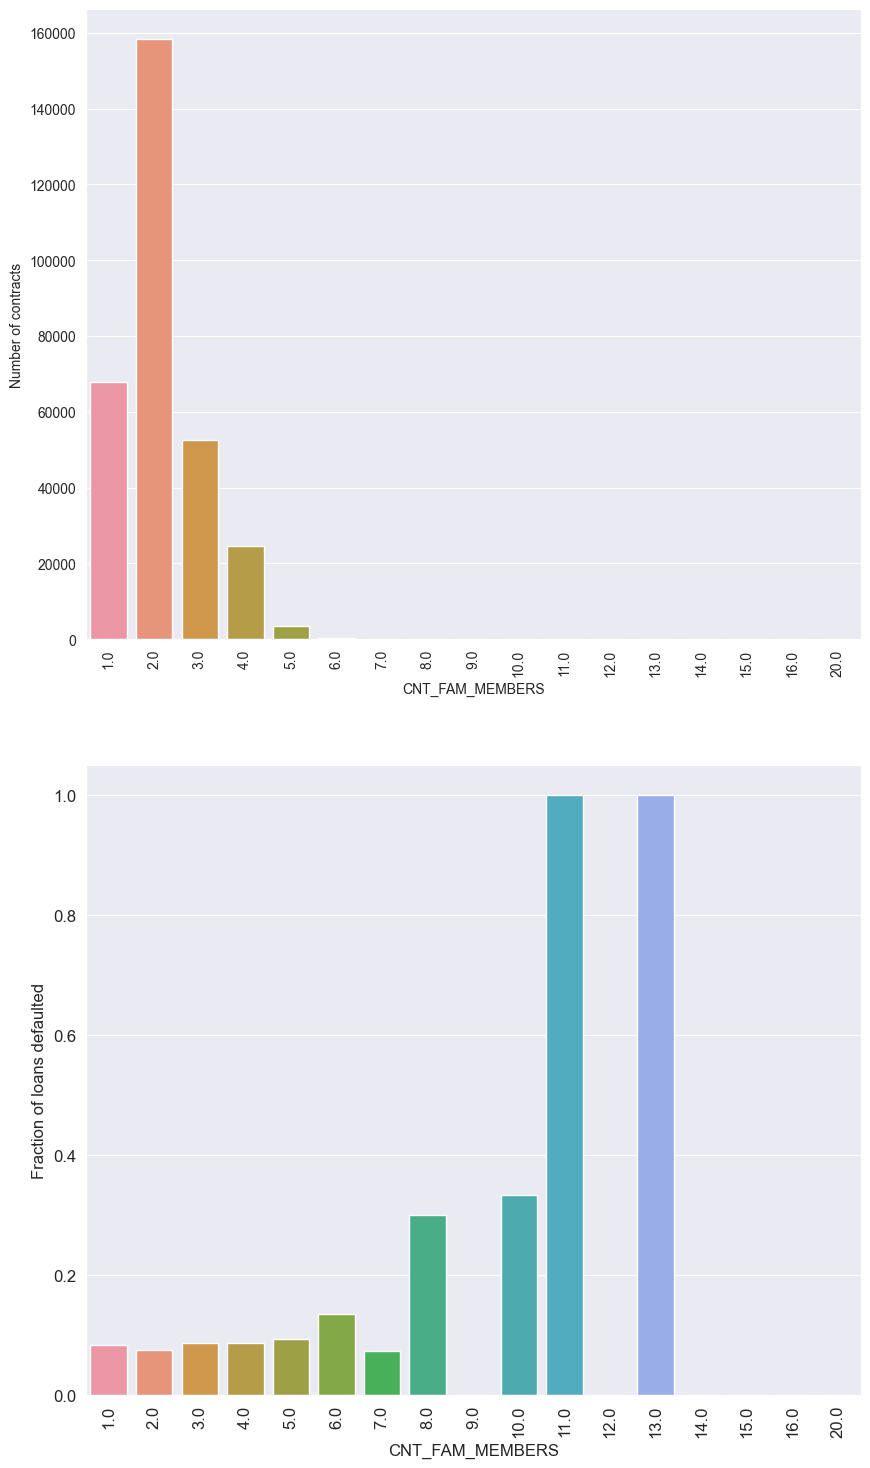

In [72]:
plot_bar_gen('CNT_FAM_MEMBERS',None,False)

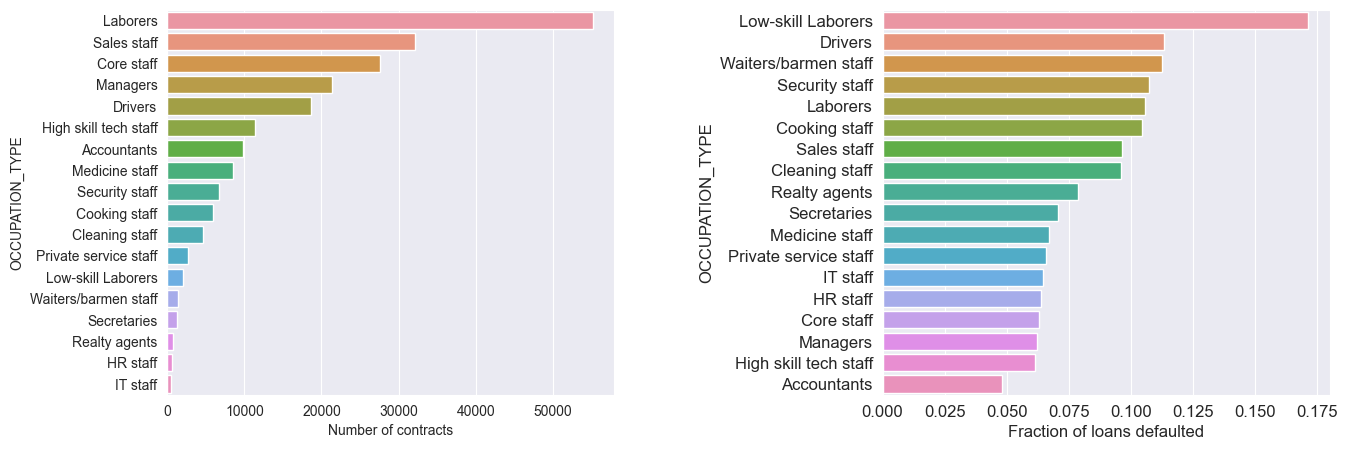

In [73]:
plot_bar_gen('OCCUPATION_TYPE')

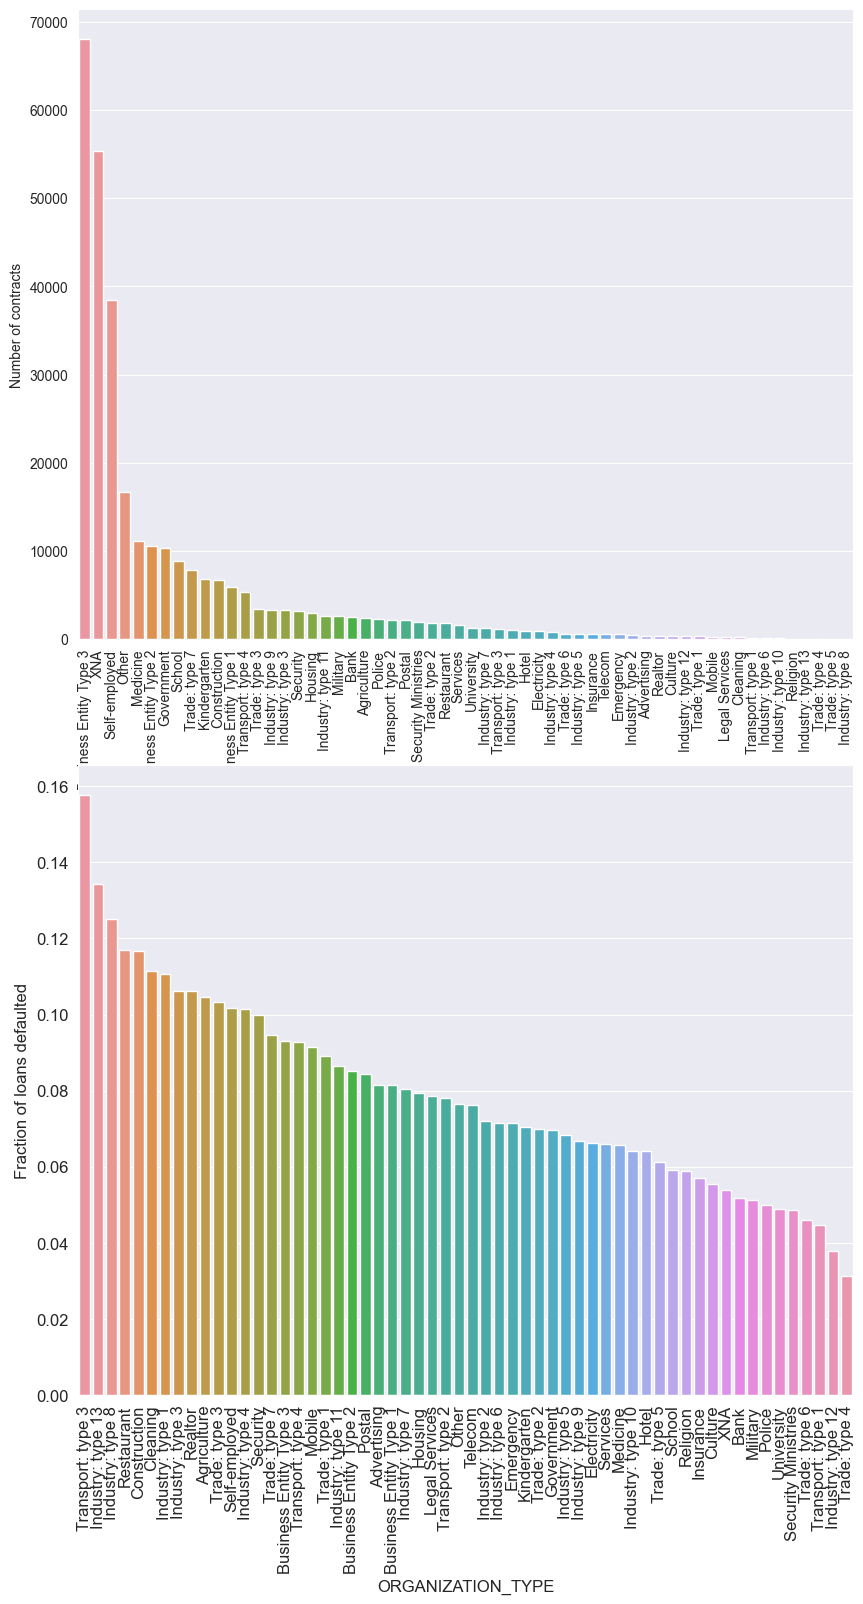

In [74]:
plot_bar_gen('ORGANIZATION_TYPE',None,False)

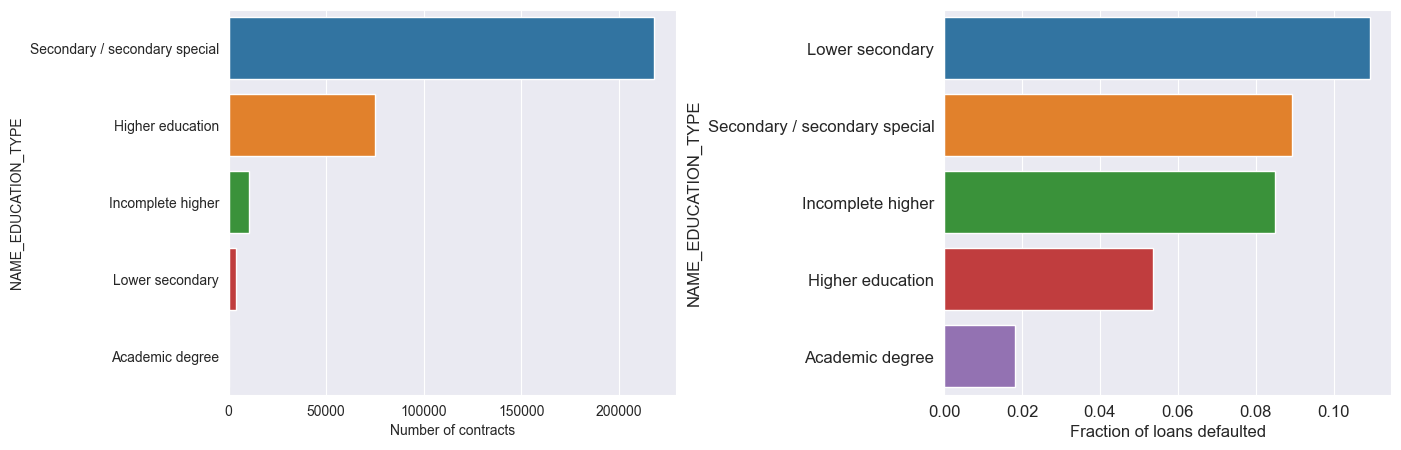

In [75]:
plot_bar_gen('NAME_EDUCATION_TYPE')

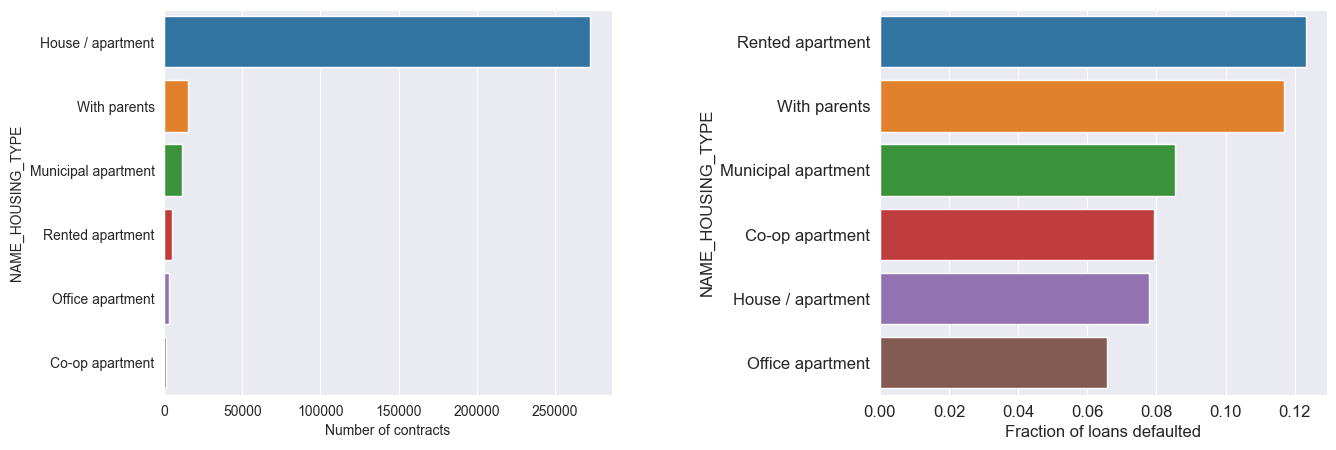

In [76]:
plot_bar_gen('NAME_HOUSING_TYPE')

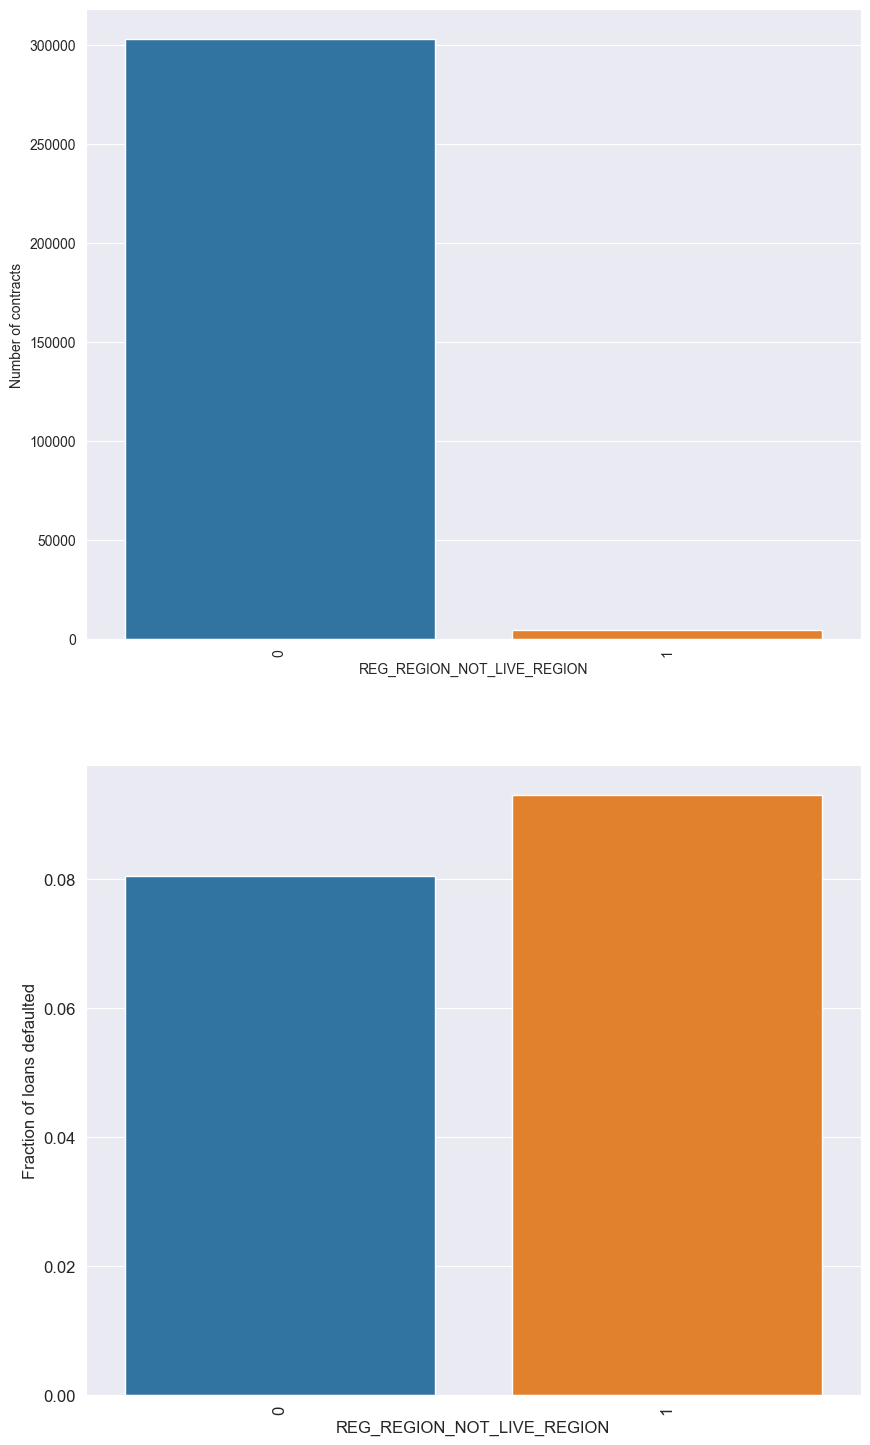

In [77]:
plot_bar_gen('REG_REGION_NOT_LIVE_REGION',None,False)

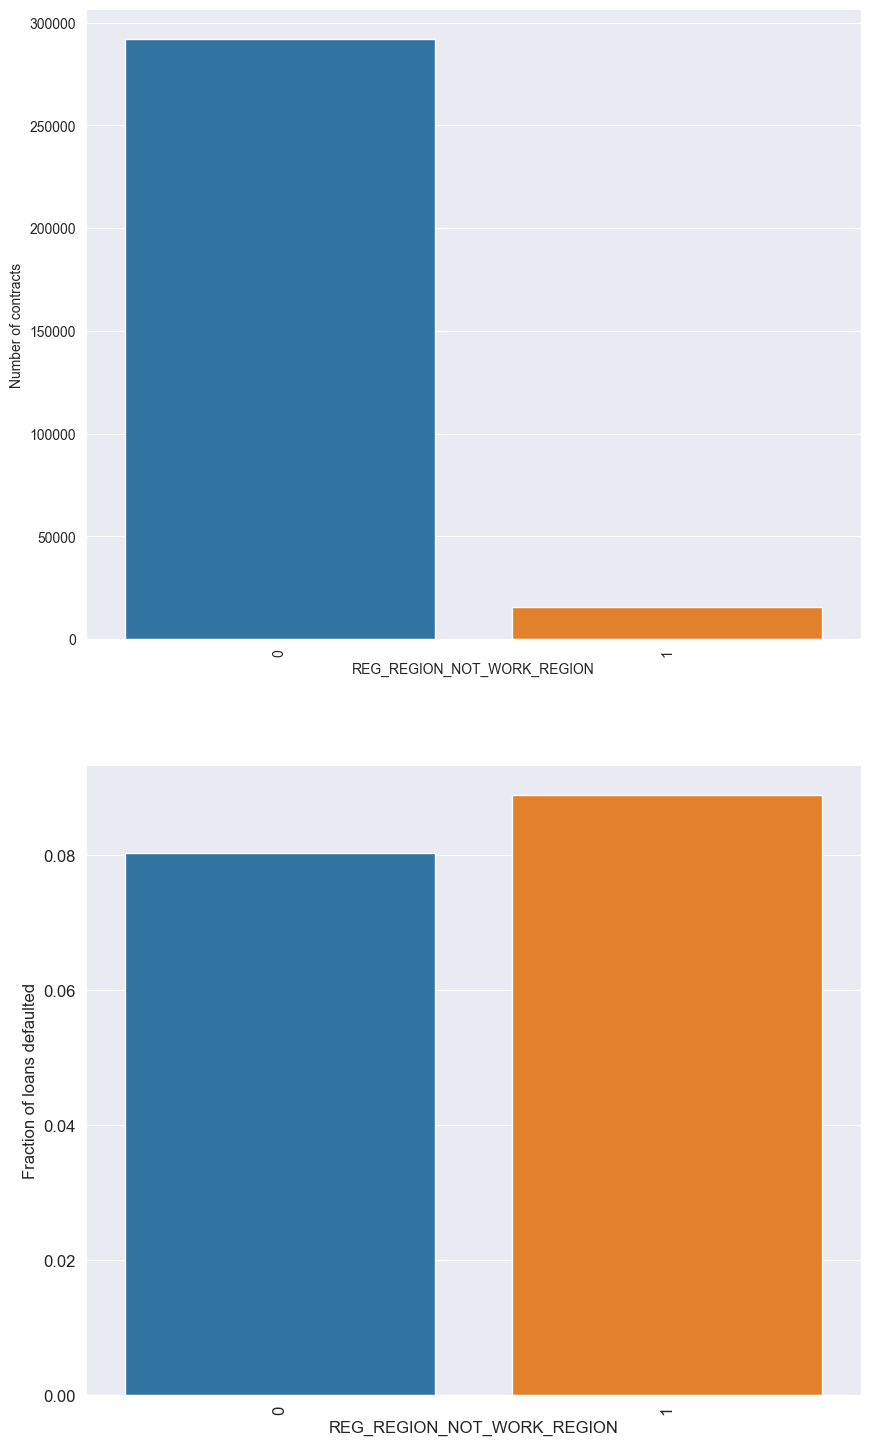

In [78]:
plot_bar_gen('REG_REGION_NOT_WORK_REGION',None,False)

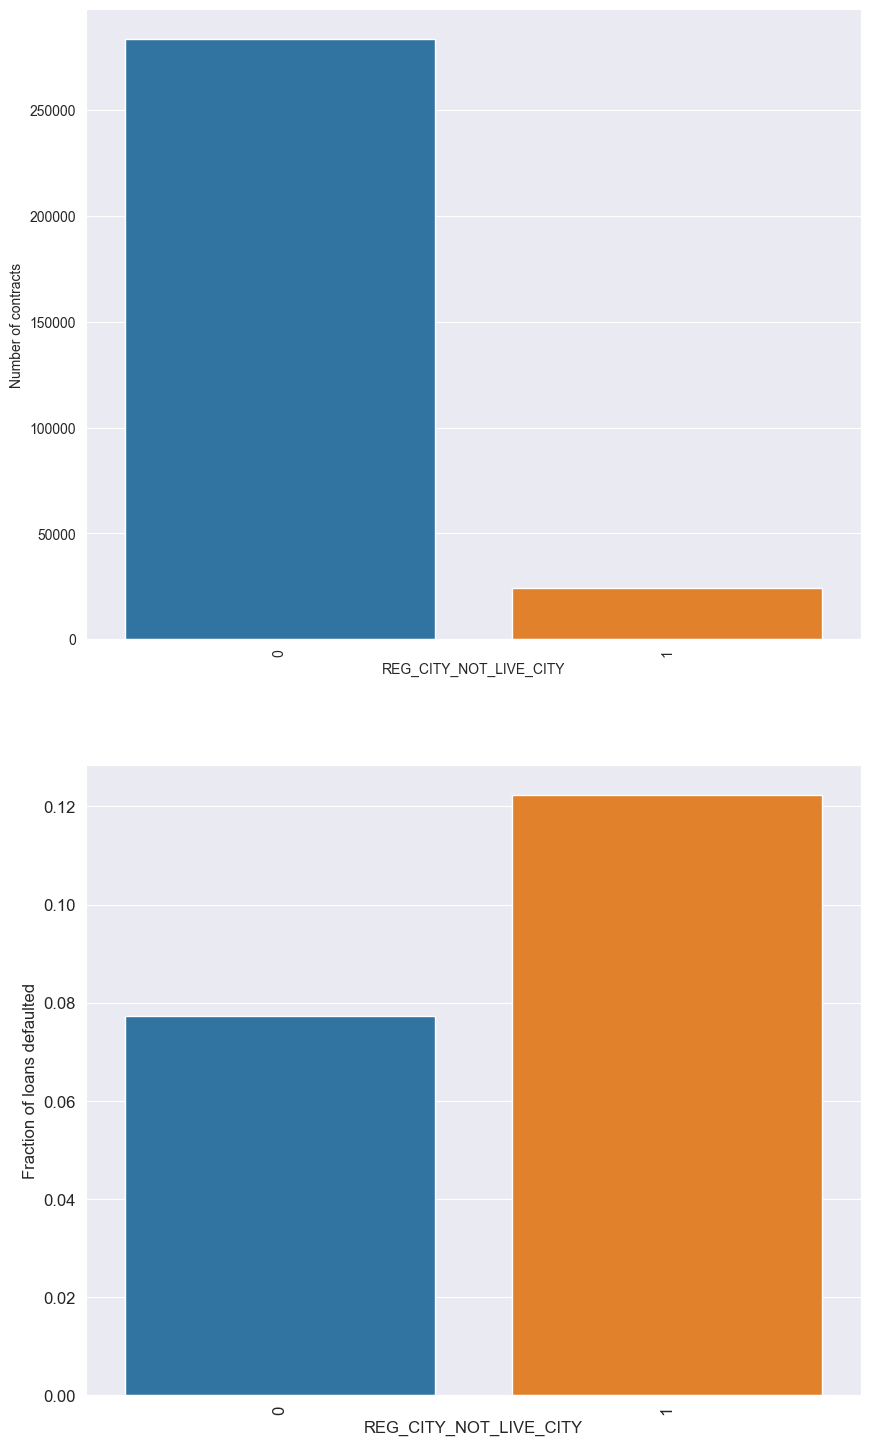

In [79]:
plot_bar_gen('REG_CITY_NOT_LIVE_CITY',None,False)

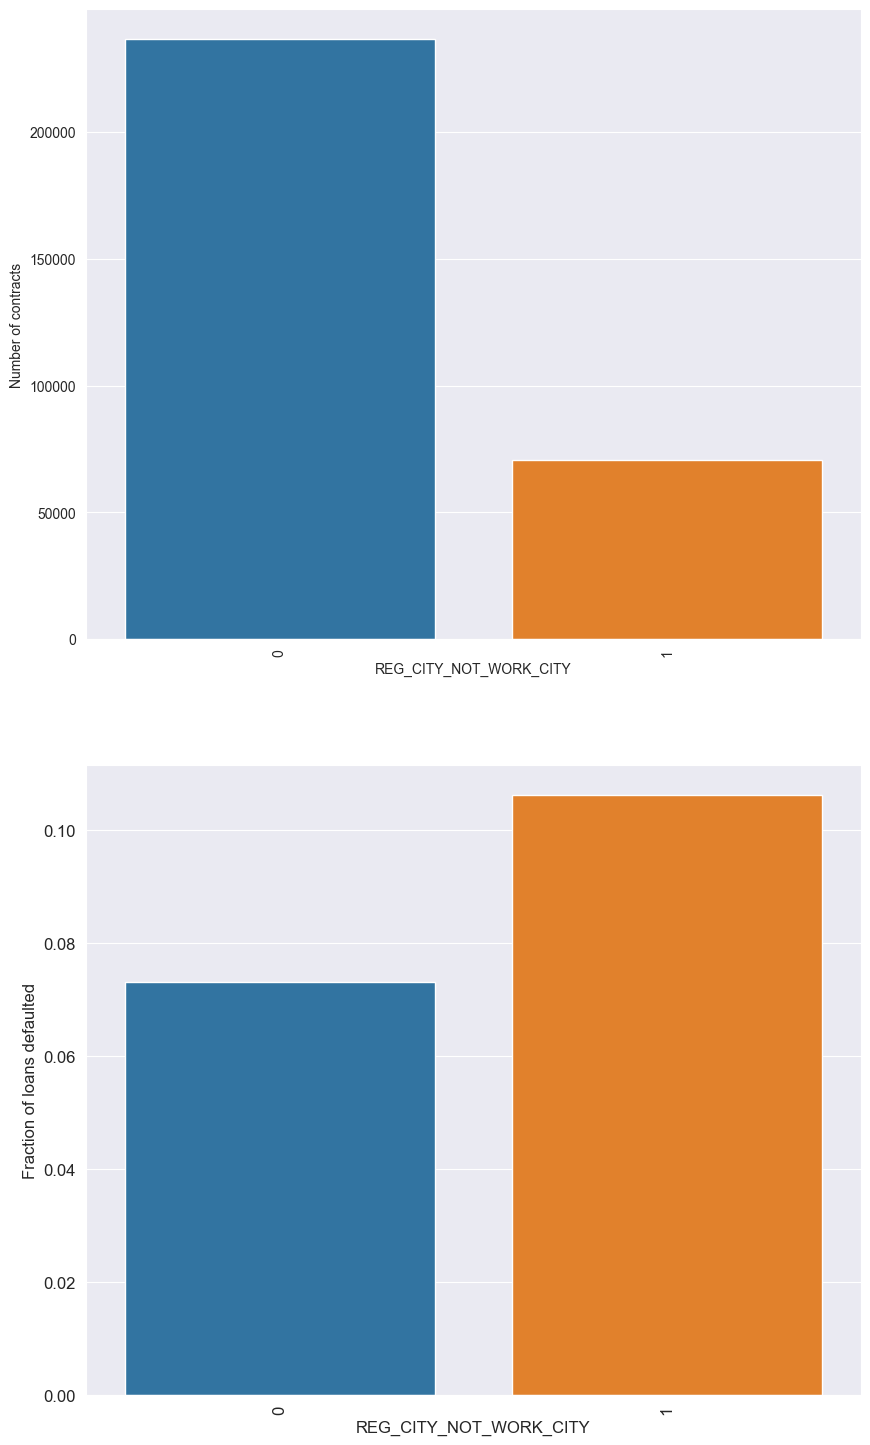

In [80]:
plot_bar_gen('REG_CITY_NOT_WORK_CITY',None,False)

In [81]:
# Plot distribution of one feature with or without paid/default shown separately

def plot_distribution_gen(feature,d=None,separate_target=False):
    if d is None:
        d = df
    else:
        d = d
        
    if separate_target == False:
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.distplot(d[feature].dropna(),color='red', kde=True,bins=100)
    else:
        t1 = d.loc[df['TARGET'] != 0]
        t0 = d.loc[df['TARGET'] == 0]
        
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.set_style('whitegrid')
#         sns.kdeplot(t1[feature], bw=0.5,label="Loan defaulted (TARGET=1)")
#         sns.kdeplot(t0[feature], bw=0.5,label="Loan repaid (TARGET = 0)")
        
        sns.kdeplot(d.loc[df['TARGET'] == 0, feature], label = 'target == 0')
        sns.kdeplot(d.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.legend(loc="best", labels=['Loan repaid (TARGET=0)', 'Loan defaulted (TARGET=1)'])
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [82]:
def get_thresh(feature):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(df[feature])
    sdev=np.std(df[feature])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',feature,':',threshold)
    return threshold

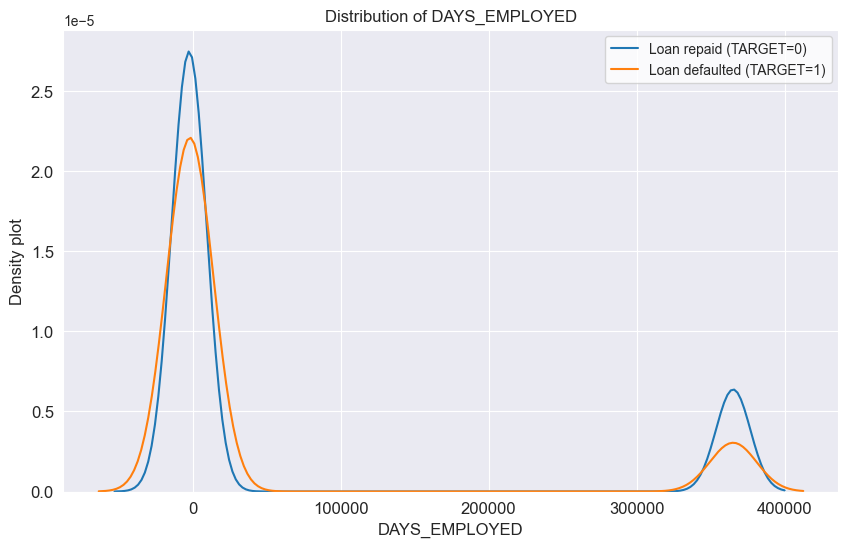

In [83]:
plot_distribution_gen('DAYS_EMPLOYED',None,True)

C:\Users\sansk\AppData\Local\Temp\ipykernel_17596\844958353.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[feature].dropna(),color='red', kde=True,bins=100)


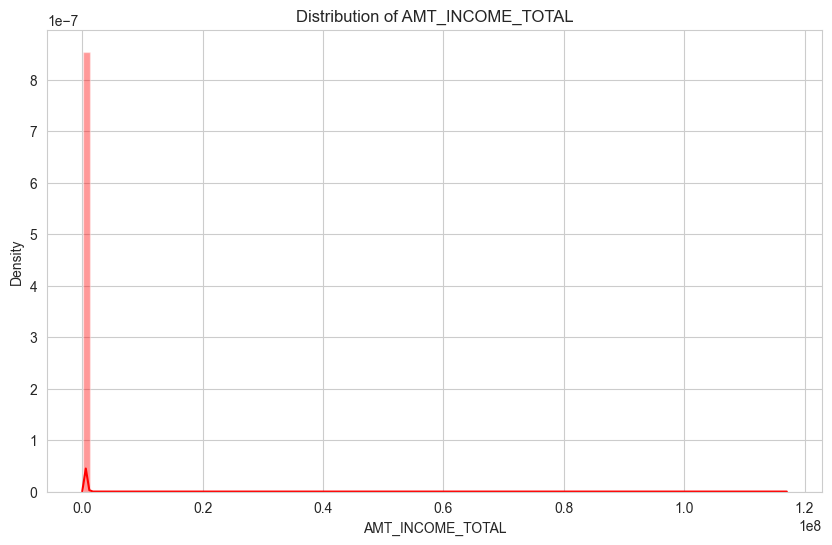

In [84]:
plot_distribution_gen('AMT_INCOME_TOTAL')

In [86]:
thresh_income = get_thresh('AMT_INCOME_TOTAL')
thresh_employment = get_thresh('DAYS_EMPLOYED')

anomalous_employment = df[df['DAYS_EMPLOYED'] > 0]
normal_employment = df[df['DAYS_EMPLOYED'] < 0]

print('The non-anomalies default on %0.2f%% of loans' % (100 * normal_employment['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomalous_employment['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anomalous_employment))

Threshold for AMT_INCOME_TOTAL : 880166.2
Threshold for DAYS_EMPLOYED : 487641.66
The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [87]:
# Replace the anomalous values with nan

df['DAYS_EMPLOYED'].mask(df['DAYS_EMPLOYED'] > 0, inplace=True)
df['AMT_INCOME_TOTAL'].mask(df['AMT_INCOME_TOTAL'] > thresh_income, inplace=True)

In [88]:
def create_day_to_year(df,ls_cols,newcol):
    df[newcol] = round(np.abs(df[ls_cols[0]]/365))
    df.drop(columns=ls_cols,inplace=True);
    return df

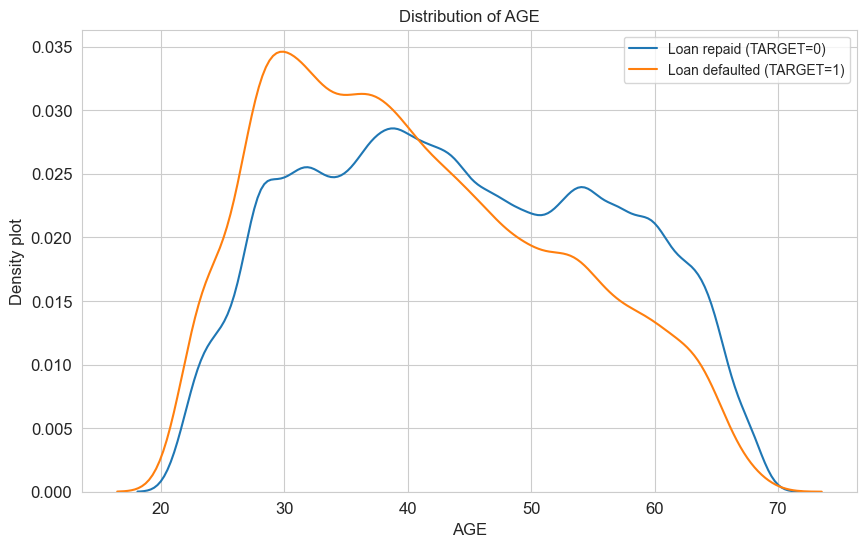

In [89]:
create_day_to_year(df,['DAYS_BIRTH'],'AGE');
plot_distribution_gen('AGE',None,True)

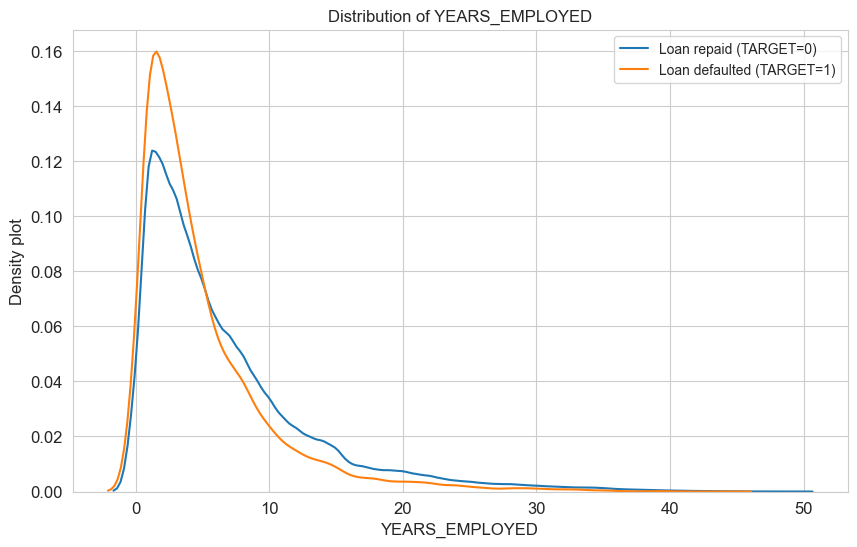

In [90]:
create_day_to_year(df,['DAYS_EMPLOYED'],'YEARS_EMPLOYED');
plot_distribution_gen('YEARS_EMPLOYED',None,True)

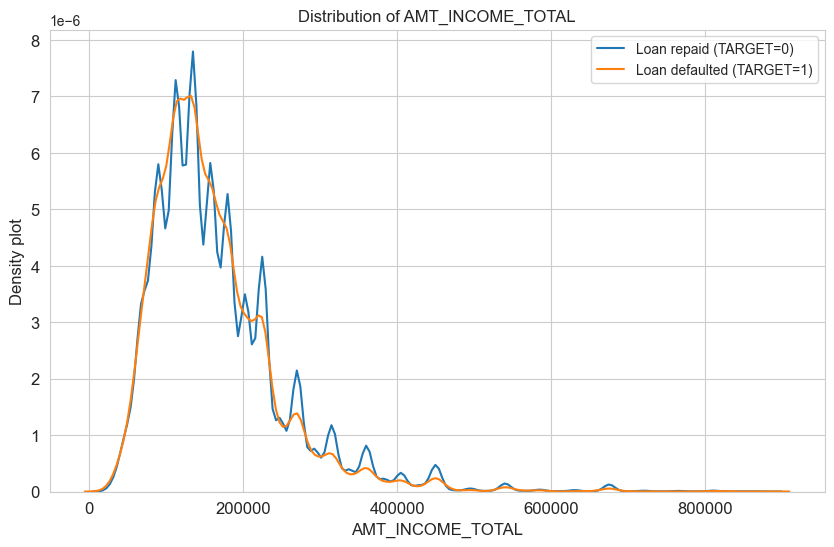

In [91]:
plot_distribution_gen('AMT_INCOME_TOTAL',None,True)

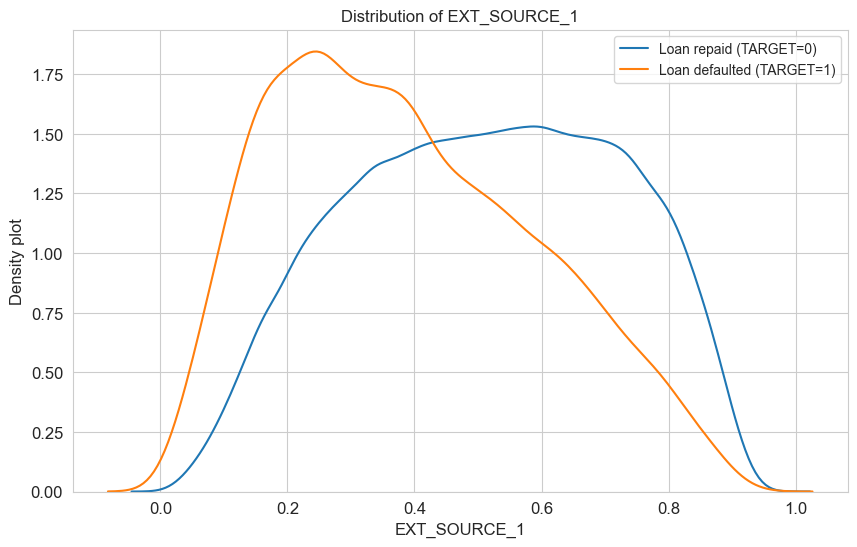

In [92]:
plot_distribution_gen('EXT_SOURCE_1',None,True)

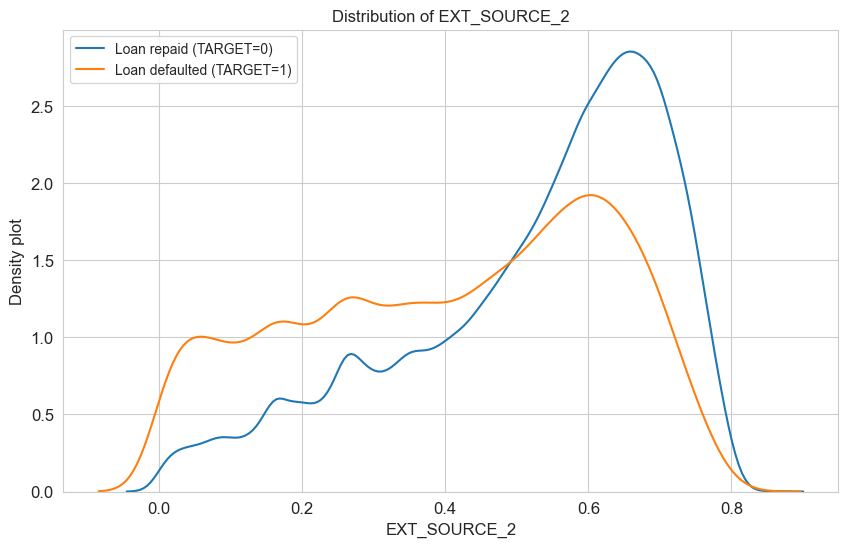

In [93]:
plot_distribution_gen('EXT_SOURCE_2',None,True)

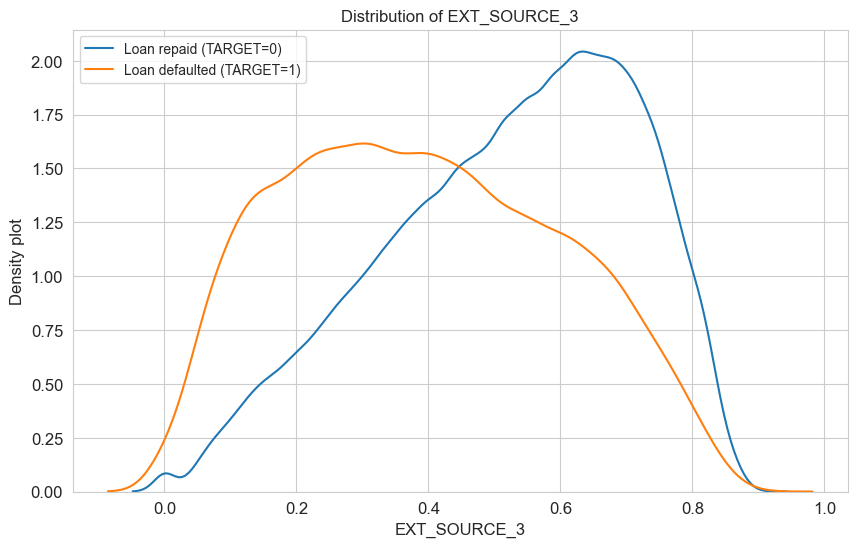

In [94]:
plot_distribution_gen('EXT_SOURCE_3',None,True)

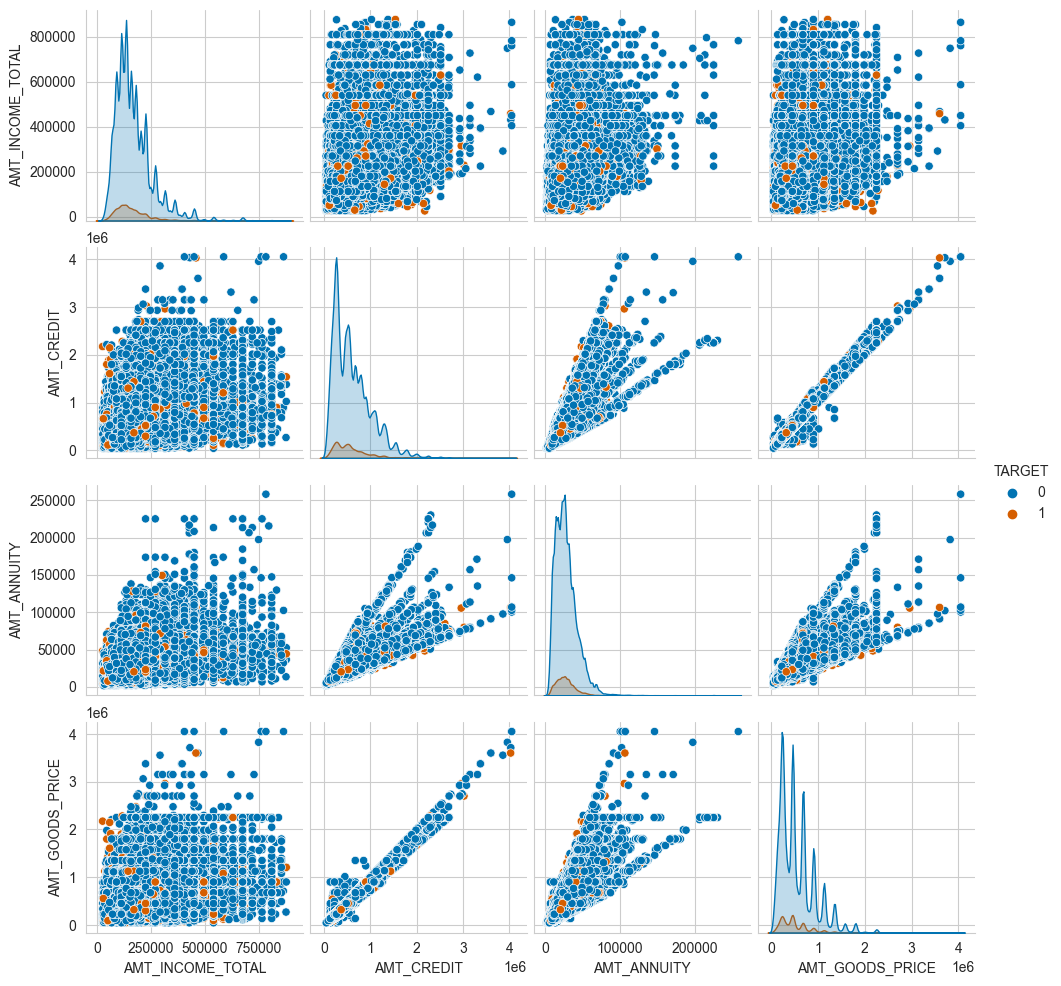

In [96]:
amt = df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
g = sns.pairplot(amt,hue="TARGET",palette=["b","r"])  

plt.show()

In [97]:
create_day_to_year(df,['DAYS_REGISTRATION'],'YEARS_REGISTRATION');

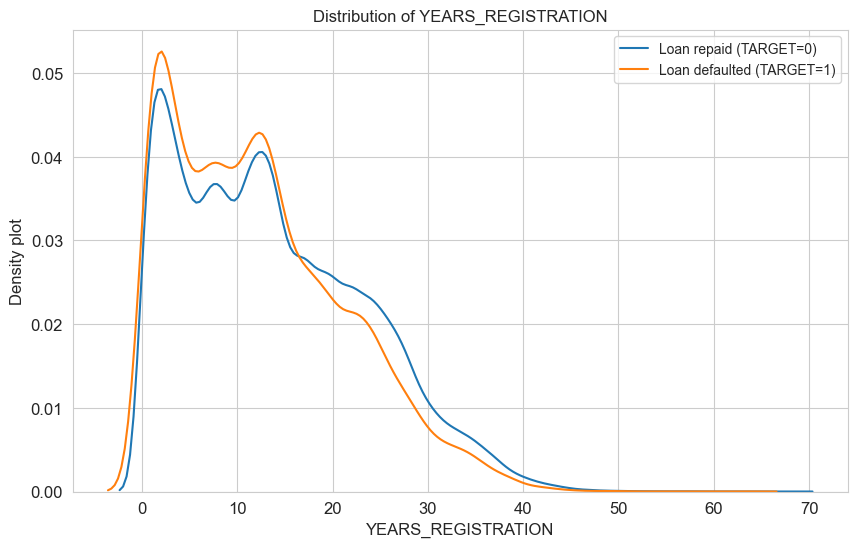

In [98]:
plot_distribution_gen('YEARS_REGISTRATION',None,True)

In [99]:
create_day_to_year(df,['DAYS_ID_PUBLISH'],'YEARS_ID_PUBLISH');

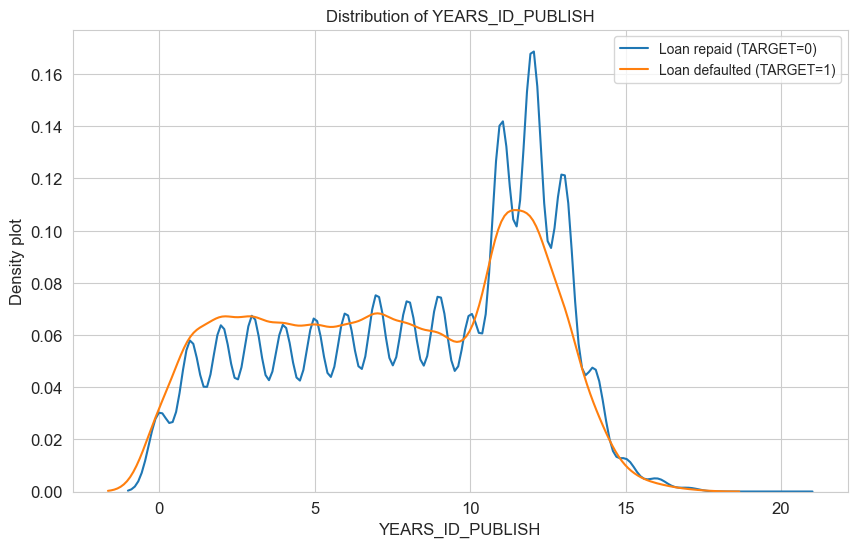

In [100]:
plot_distribution_gen('YEARS_ID_PUBLISH',None,True)